Central Limit Theorem

Imports and defines : Here we import the libraries we'll need in the code. We've chosen the exponential , poisson and uniform distributions as our distributions of choice.

In [6]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import math

numof_distributions = 3
distributions = ["Exponential", "Poisson", "Uniform"]

The function **generate_random_samples** creates 3 samples , one for each of the 3 samples mentioned above. the argument sample_size is the number of numbers we want included in our samples. A list of these 3 samples is returned at the end of the function.

In [7]:
def generate_random_samples(sample_size):
    exp_sample = random.exponential(scale=random.random(), size=sample_size)
    poi_sample = random.poisson(lam=random.random(), size=sample_size)
    uni_sample = random.uniform(size=sample_size)
    return [exp_sample, poi_sample, uni_sample]


samples = generate_random_samples(10000)

This function takes a sample of a specific distribution, then takes n numbers from the given sample and repeats this process SoM_size times. each time we take 30 numbers and calculate their mean. 30 is a safe number and CLT can often be used if the mean consists of 30 or more values. SoM_size stands for sample of means size and is the number of times we want to take the mean of 30 items. The 3 sample of means are stored in list called mean of samples. The name implies that we are storing means obtained from samples in this list. 

In [8]:
def take_sample_of_means(sample, SoM_size, n):
    return [np.random.choice(sample, n).mean() for _ in range(SoM_size)]


n = 30
means_of_samples = [take_sample_of_means(
    sample=samples[i], SoM_size=100, n=n) for i in range(numof_distributions)]

here the expected normal distribution of our sample of means is generated. the true mu of the population is the mean of the distributions we had in the first place. likewise sigma can be calculated. the calculation of these values is done via numpy functions and methods. then we generate 1000 values ranging from mu - 3 * sigma to mu + 3 * sigma creating a normal distribution around this area than contains most of the values. the expected normal graph is a normal distribution with the arguments mu and sigma / the square root of n. n being 30. we discussed n earlier. 

In [9]:
def calc_expected_normal_dist(sample, n, k):
    mu, sigma = np.mean(sample), np.std(sample)
    normal_samples = np.linspace(mu - k*sigma, mu + k*sigma, 1000)
    pdf_normal = norm.pdf(normal_samples, mu, sigma / math.sqrt(n))
    return normal_samples, pdf_normal


k = 3
samples_data = [calc_expected_normal_dist(
    sample=samples[i], n=n, k=k) for i in range(numof_distributions)]

The data we got from the previous function are displayed using graphs. 

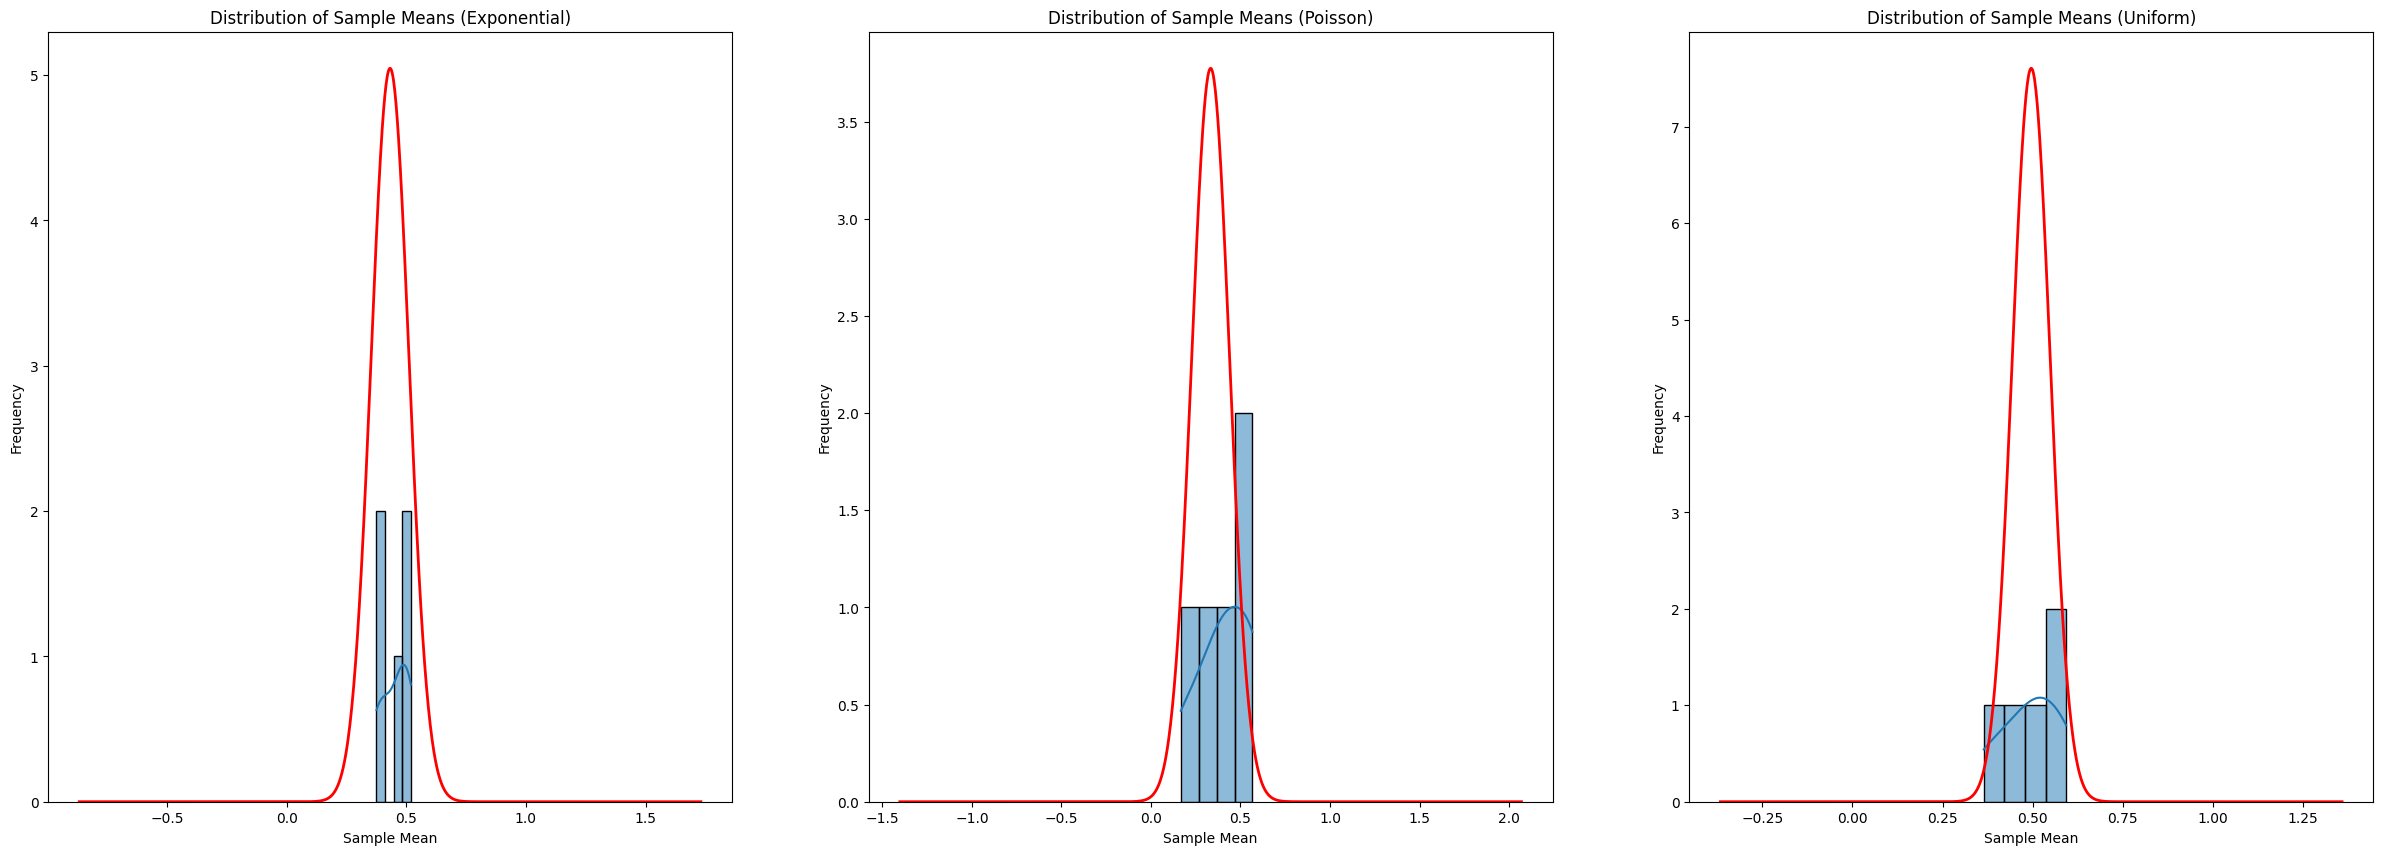

In [10]:
def draw_graph(samples_data):
    fig, axs = plt.subplots(1, numof_distributions, figsize=(30, 10))

    for i in range(numof_distributions):
        normal_sample, pdf_normal = samples_data[i][0], samples_data[i][1]
        sns.histplot(means_of_samples[i], kde=True, ax=axs[i])
        axs[i].plot(normal_sample, pdf_normal, 'r', lw=2)
        axs[i].set_title(
            'Distribution of Sample Means (' + distributions[i] + ')')
        axs[i].set_xlabel('Sample Mean')
        axs[i].set_ylabel('Frequency')
    plt.show()


draw_graph(samples_data=samples_data)

### Questions :
2- There are a few different parameters to be talked about : 

1000 : This is the number of values each distribution contains. we simply created 1000 numbers for each sample. increasing this number will result in having more numbers. but 1000 is already a number big enough so that choosing 30 of these works just fine.

n : (defined as 30) is the number of numbers we take the mean of each time when we create a sample of means. Increasing this numbers leads to getting a sharper expected normal graph meaning there is a lower variance. This helps us better the determine the true mean of the each of the samples. if we chose all 1000 numbers and calculated their mean this would result in finding the exact mean of the numbers and the normal graph would look like a straight line going up (dirac delta function). This could've been predicted by the arguments of the expected normal distribution. the standard devialtion argument is sigma divided by the square root of n and by making n larger we get a lower variance as an argument. 

SoM_size : the number of times we take n numbers and calculate their mean. increasing this value leads to us having more means in our sample and helps create a better graph. if SoM_size is too small we dont have enough means to determine the mean of the data exactly and our graph would indeed be inaccurate. 